# PassiveAggressiveRegressor with StandardScaler & Quantile Transformer


**This Code template is for the regression analysis using a PassiveAggressive Regression and the feature rescaling technique StandardScaler along with Quantile Transformer as a feature transformation technique in a pipeline** 

### Required Packages

In [1]:
import warnings as wr
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
wr.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= ""

List of features which are  required for model training .

In [3]:
#x_values
features=[]

Target feature for prediction.

In [4]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path) #reading file
df.head()#displaying initial entries

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324,107,4.0,4.0,4.5,8.87,1,0.76
2,3,316,104,3.0,3.0,3.5,8.00,1,0.72
3,4,322,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314,103,2.0,2.0,3.0,8.21,0,0.65


In [6]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 400 ,and number of columns are : 9


In [7]:
df.columns.tolist()


['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [8]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

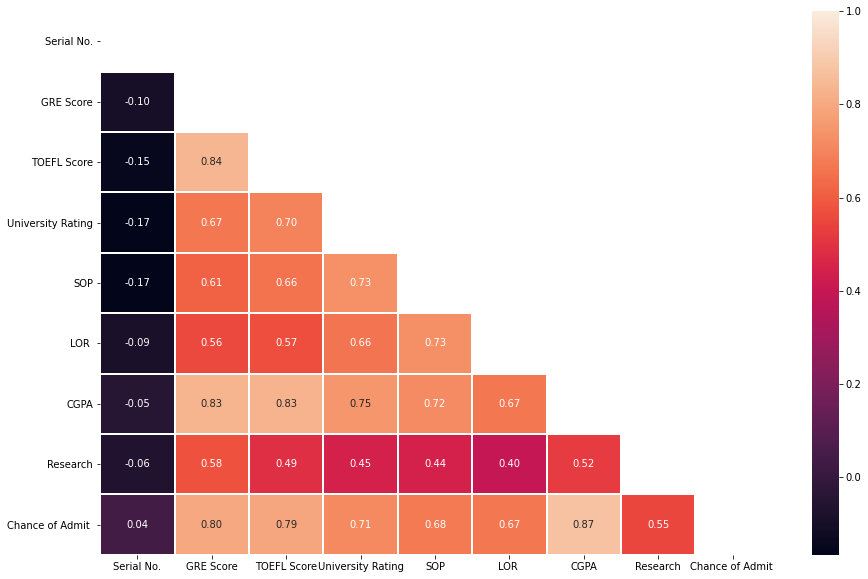

In [9]:
plt.figure(figsize = (15, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [10]:
correlation = df[df.columns[1:]].corr()[target][:]
correlation

GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.713202
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [11]:
#spliting data into X(features) and Y(Target)

X=df[features]
Y=df[target]  

Calling preprocessing functions on the feature and target set.

In [12]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4.0,4.5,4.5,9.65,1
1,2,324,107,4.0,4.0,4.5,8.87,1
2,3,316,104,3.0,3.0,3.5,8.00,1
3,4,322,110,3.0,3.5,2.5,8.67,1
4,5,314,103,2.0,2.0,3.0,8.21,0


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [13]:
#we can choose randomstate and test_size as over requerment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) #performing datasplitting


### Data Scaling
**Used StandardScaler**

* Standardize features by removing the mean and scaling to unit variance The standard score of a sample x is calculated as:

z = (x - u) / s

* Where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

### Feature Transformation
**QuantileTransformer :**

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

More about QuantileTransformer module https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

## Model
**passive-aggressive regressor**

The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate. However, contrary to the Perceptron, they include a regularization parameter C

* **C ->** Maximum step size (regularization). Defaults to 1.0.

* **max_iter ->** The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.

* **tol->** The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).

* **early_stopping->** Whether to use early stopping to terminate training when validation. score is not improving. If set to True, it will automatically set aside a fraction of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs.

* **validation_fraction->** The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.

* **n_iter_no_change->** Number of iterations with no improvement to wait before early stopping.

* **shuffle->** Whether or not the training data should be shuffled after each epoch.

* **loss->** The loss function to be used: epsilon_insensitive: equivalent to PA-I in the reference paper. squared_epsilon_insensitive: equivalent to PA-II in the reference paper.

* **epsilon->** If the difference between the current prediction and the correct label is below this threshold, the model is not updated.


In [14]:
#training the PassiveAggressiveRegressor

model = make_pipeline(StandardScaler(),QuantileTransformer(),PassiveAggressiveRegressor(random_state=1))
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('quantiletransformer', QuantileTransformer()),
                ('passiveaggressiveregressor',
                 PassiveAggressiveRegressor(random_state=1))])

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [15]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 64.09 %



In [16]:
#prediction on testing set
prediction=model.predict(X_test)

### Model evolution


**r2_score:** The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

**MAE:** The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

**MSE:** The mean squared error function squares the error(penalizes the model for large errors) by our model.

In [17]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error: 0.08091529457651325
Mean Squared Error: 0.008304895948044125
Root Mean Squared Error: 0.09113120183583735


In [18]:
print("R-squared score : ",r2_score(y_test,prediction))

R-squared score :  0.6409072147295123


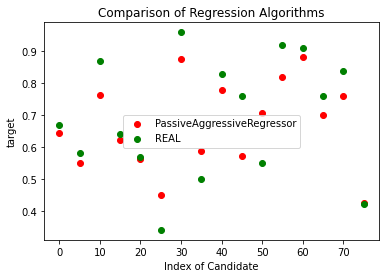

In [19]:
#ploting actual and predicted
red = plt.scatter(np.arange(0,80,5),prediction[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "green")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("target")
plt.legend((red,green),('PassiveAggressiveRegressor', 'REAL'))
plt.show()


### Prediction Plot
First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

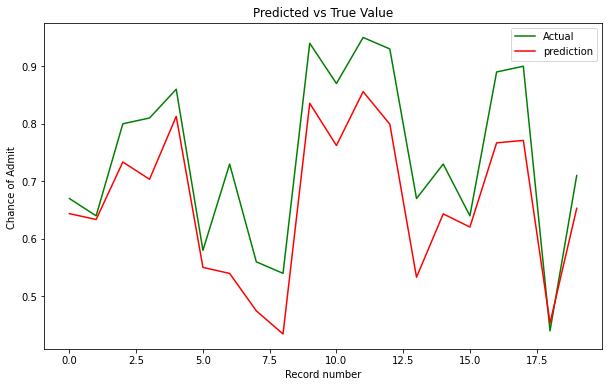

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Vipin Kumar , Github: [Profile](https://github.com/devVipin01)